Based on: http://stackoverflow.com/questions/29718238/how-to-read-mp4-video-to-be-processed-by-scikit-image

In [8]:
%pylab inline
import imageio

Populating the interactive namespace from numpy and matplotlib


In [9]:
!ls videos/

'Homeland' Suffered A Major Intelligence Failure-9IE1mUL1erk.mp4
19 Days And Counting-JxQKYgw9G2k.mp4
A Modest PromPosal For Bernie Sanders-kRsRUIPoW4E.mp4
A Moment For South Carolina-GDFrVwgicsc.mp4
A Special Halloween Warning-mkuyOVckB8s.mp4
A Tahini Bit Of Perspective On Politics-q-cirwvF-SI.mp4
A Tribute To Glenn Frey-0DaJGhJz7SY.mp4
All You Can Trump Buffet-F5zjVUZA7rY.mp4
And Now, Some Totally Organic Product Placement, Part 2-ua1jbS-je8I.mp4
Baby Hitler Is No Match For Jeb!-76MlVLbv1zE.mp4
Bernie Can't Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4
Bernie Only Smoked Pot Twice-xnSbHaIG4j4.mp4
Bernie Sanders Promposals-Ks2v3LSd29U.mp4
Bernie Sandwiches Won New Hampshire-c6RVKCqGhCM.mp4
Better Know A Breyer-_uziCZg0_8U.mp4
China Finally Wants To Clear The Air-_w4x2qez138.mp4
Coal Miners Love Trump-hvRU_Y2VWAg.mp4
Department Of Environmental, You’re Fired-1l0V9Sri-Hw.mp4
Did Ben Carson Really Try To Stab A Dude-d1XAyL7PE_s.mp4
Diplomas Of Lies-yN9g0XsDu-E.mp4
Donald Trump 

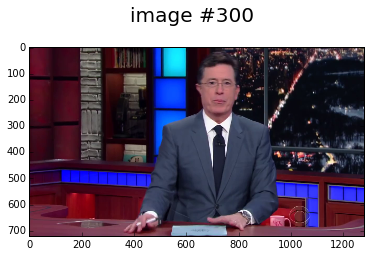

In [10]:
filename = "videos/Bernie Can't Be The Only Candidate With An Ice Cream-z3qN-BU1b2M.mp4"
vid = imageio.get_reader(filename,  'ffmpeg')
nums = [300]
for num in nums:
    image = vid.get_data(num)
    fig = pylab.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    pylab.imshow(image)


In [4]:
image_seq=[] 
for i,im in enumerate(vid):
    image_seq.append((i,im))
    print '\r',i,
    if i>100:
        break
    

101


In [5]:
import pickle
pickle.dump(image_seq,open('moveFrames.pkl','w'))

In [6]:
image.shape

(720, 1280, 3)

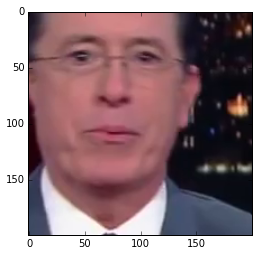

In [7]:
pylab.imshow(image[100:300,650:850])

Fitting model on a small sub-sample of the data
done in 0.597s.
Predicting color indices on the full image (k-means)
done in 0.158s.


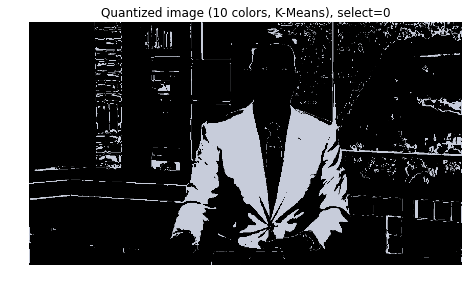

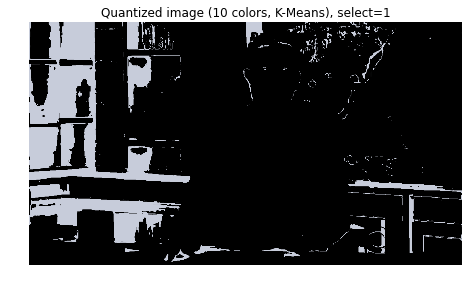

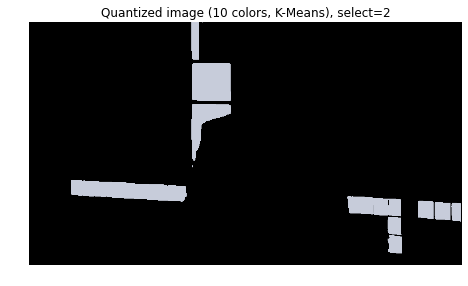

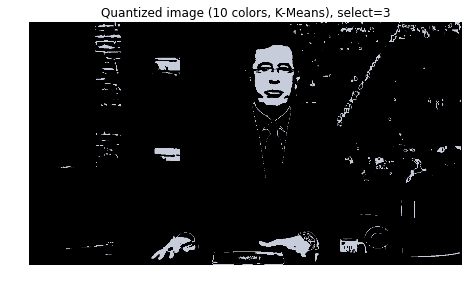

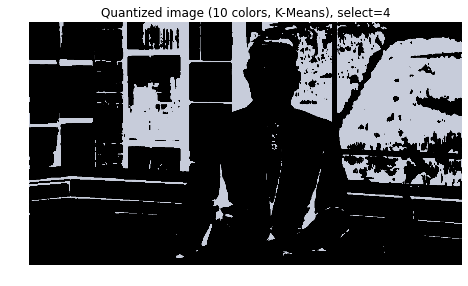

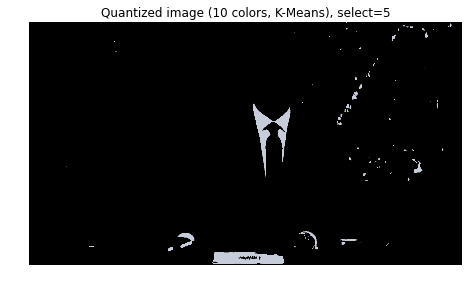

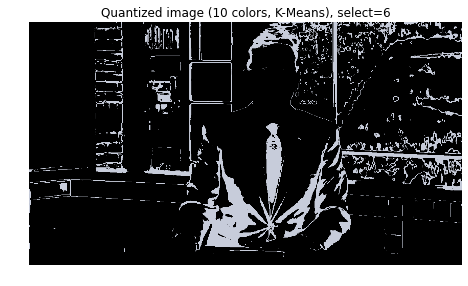

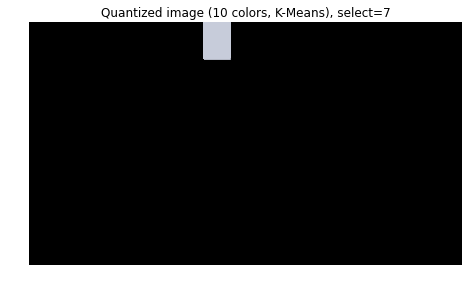

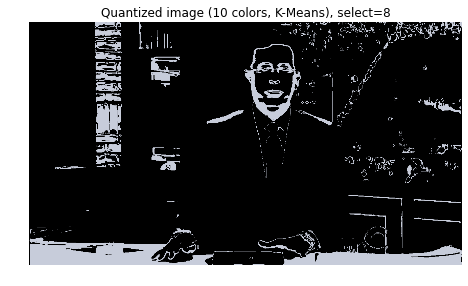

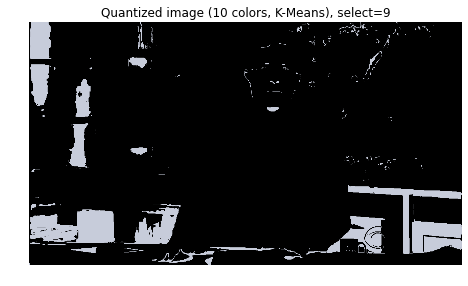

In [23]:
# %load plot_color_quantization.py
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 10

china = image

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1]
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:10000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h,select=None):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            if select==None:
                image[i][j] = codebook[labels[label_idx]]
            else:
                if labels[label_idx]==select:
                    image[i][j] = codebook[5]
            label_idx += 1
    return image

for color in range(n_colors):
    plt.figure(color+1)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title('Quantized image (%d colors, K-Means), select=%d'%(n_colors,color))
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h,select=color))


In [11]:
shape(image_seq[-1][1])

(720, 1280, 3)

In [12]:
import skimage.util

In [24]:
kmeans.cluster_centers_

array([[ 0.23163485,  0.25495131,  0.34905337],
       [ 0.22817295,  0.03637841,  0.09452792],
       [ 0.08911558,  0.18737725,  0.94795818],
       [ 0.65975909,  0.49333021,  0.50950766],
       [ 0.05715516,  0.03719443,  0.07346107],
       [ 0.78125721,  0.80157632,  0.8550173 ],
       [ 0.14633748,  0.14579439,  0.21390374],
       [ 0.06369317,  0.80383538,  0.93406593],
       [ 0.45707682,  0.31862461,  0.36743393],
       [ 0.38514093,  0.07677313,  0.12881434]])

In [25]:
skin_color3=kmeans.cluster_centers_[3,:]
skin_color3

array([ 0.65975909,  0.49333021,  0.50950766])

In [15]:
skin_color2=kmeans.cluster_centers_[0,:]
skin_color2

array([ 0.66309743,  0.49872855,  0.51168811])

In [16]:
skin_color1=np.array([ 0.21697945,  0.16844872,  0.1788046 ])
skin_color1

array([ 0.21697945,  0.16844872,  0.1788046 ])

In [17]:
skin_color1/skin_color2

array([ 0.32722107,  0.33775632,  0.3494406 ])

In [29]:
from skimage import color
image_hsv=color.rgb2hsv(image)

In [31]:
H=image_hsv[:,:,0]

In [33]:
H.shape

(720, 1280)

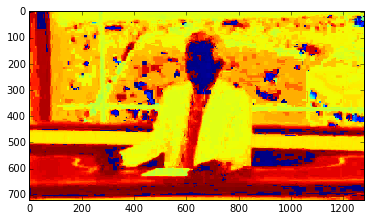

In [37]:
imshow(H)